# Analysis

In [1]:
import pandas as pd
from pathlib import Path
from major_assignment_2_duffy.config import PROCESSED_DATA_DIR, FIGURES_DIR
import matplotlib.pyplot as plt

In [2]:
# Get data
output_path: Path = PROCESSED_DATA_DIR / "dataset.csv"

df = pd.read_csv(output_path)

In [3]:
df.head()

,season,week,team_key,team_name,manager_guid,manager_name,player_name,played_position,position_type,pass_yds,...,pts_allow_0,pts_allow_1_6,pts_allow_7_13,pts_allow_14_20,pts_allow_21_27,pts_allow_28_34,pts_allow_35_plus,xpr,points,noppr_points
0,2023,1,423.l.927065.t.8,nooch,2LZKPL56AY3GJ5QCXA6HWZOMGA,nick,Odell Beckham,BN,O,0,...,0,0,0,0,0,0,0,0,5.70,3.7
1,2025,14,461.l.1390291.t.2,Dust Off Frankie,BHMUHFWNWP25IWXVETH4HHI7AY,Frankie,Trevor Lawrence,QB,O,244,...,0,0,0,0,0,0,0,0,19.36,NaN
2,2025,14,461.l.1390291.t.2,Dust Off Frankie,BHMUHFWNWP25IWXVETH4HHI7AY,Frankie,DK Metcalf,WR,O,0,...,0,0,0,0,0,0,0,0,21.80,NaN
3,2025,14,461.l.1390291.t.2,Dust Off Frankie,BHMUHFWNWP25IWXVETH4HHI7AY,Frankie,Alec Pierce,WR,O,0,...,0,0,0,0,0,0,0,0,13.00,NaN
4,2025,14,461.l.1390291.t.2,Dust Off Frankie,BHMUHFWNWP25IWXVETH4HHI7AY,Frankie,Devaughn Vele,WR,O,0,...,0,0,0,0,0,0,0,0,7.00,NaN


In [4]:
grouped = df.groupby(['manager_name', 'season'])['points'].mean().reset_index().sort_values(by='points', ascending=False)
grouped

,manager_name,season,points
16,Skyler,2024,12.061739
23,daniel,2023,12.040000
0,Billy,2023,11.980833
19,chris,2024,11.756162
5,Frankie,2023,11.713546
9,Joseph,2024,11.269895
3,David,2023,11.187655
8,Joseph,2023,11.064301
28,nick,2024,11.064101
25,john,2024,11.035468


Skyler averaged the most points in the 2024 Season!

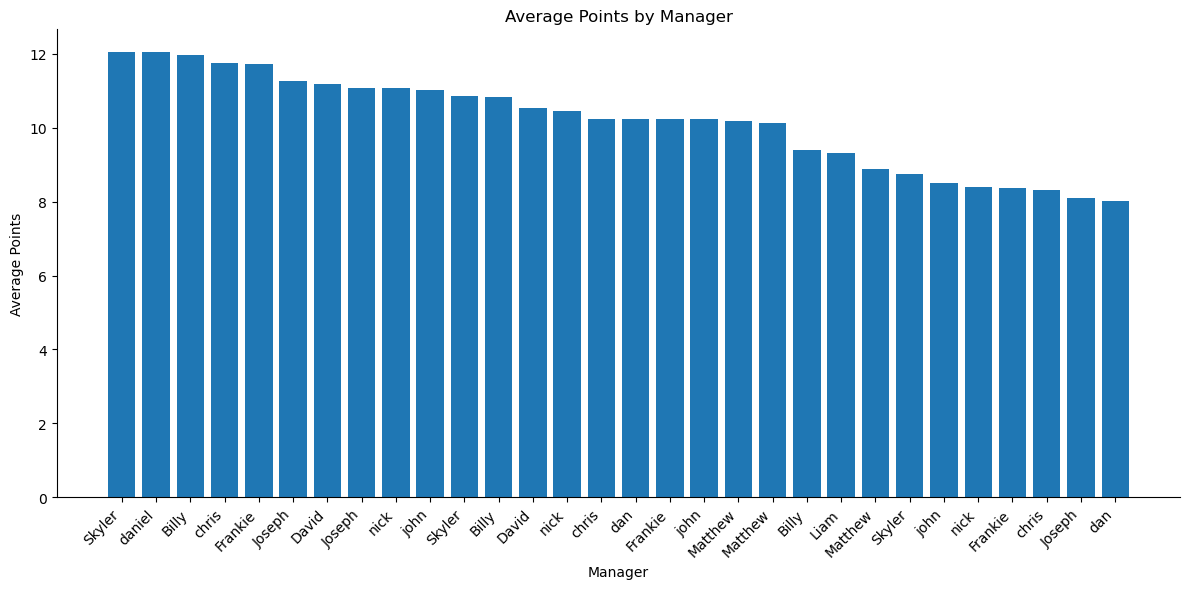

In [5]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(grouped)), grouped['points'])
plt.xticks(range(len(grouped)), grouped['manager_name'], rotation=45, ha='right')
plt.xlabel('Manager')
plt.ylabel('Average Points')
plt.title('Average Points by Manager')
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig(FIGURES_DIR / 'average_points_by_manager.png')
plt.show()